In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("clean_df.csv")

X = df[["Score","Scored by", "Members", "Favorites"]]
X.head()

,Score,Scored by,Members,Favorites
0,9.25,719706,1176368,105387
1,9.19,454969,705186,33936
2,9.16,70279,194359,5597
3,9.16,12609,186331,1117
4,9.14,552791,990419,90365


In [2]:
import sklearn
print(sklearn.__version__)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
Z=sc.fit_transform(X)
n=X.shape[0]
p=X.shape[1]
print(Z)

0.20.1
[[ 3.91153554e+00  6.49739880e+00  6.26156814e+00  1.37643374e+01]
 [ 3.73599001e+00  3.87946629e+00  3.47032066e+00  4.21516879e+00]
 [ 3.64821724e+00  7.53419888e-02  4.44219113e-01  4.27763574e-01]
 ...
 [-1.26705773e+00 -1.14223843e-02 -8.93548603e-02 -3.03014920e-01]
 [-1.26705773e+00 -5.89432912e-01 -6.30920211e-01 -3.18651548e-01]
 [-1.26705773e+00 -1.61445441e-01 -1.18909329e-01 -2.76151994e-01]]


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [3]:
import numpy
print(numpy.mean(Z,axis=0))

[2.79495880e-15 3.77697135e-17 3.77697135e-17 3.77697135e-17]


In [4]:
#écart-type 
print(numpy.std(Z,axis=0,ddof=0))
#toutes les valeurs sont égales à 1 donc bonne reduction

[1. 1. 1. 1.]


In [5]:
#classe pour l'ACP 
from sklearn.decomposition import PCA 
#instanciation 
acp = PCA(svd_solver='full')
print(acp)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)


In [6]:
coord=acp.fit_transform(Z)
print(acp.n_components_)

4


In [7]:
#variance expliquée 
eigval = (n-1)/n*acp.explained_variance_ 
print(eigval)

[2.9987449  0.76063794 0.22685146 0.0137657 ]


In [8]:
#ou bien en passant par les valeurs singulières 
print(acp.singular_values_**2/n)

[2.9987449  0.76063794 0.22685146 0.0137657 ]


In [9]:
#proportion de variance expliquée 
print(acp.explained_variance_ratio_)

[0.74968623 0.19015948 0.05671287 0.00344142]


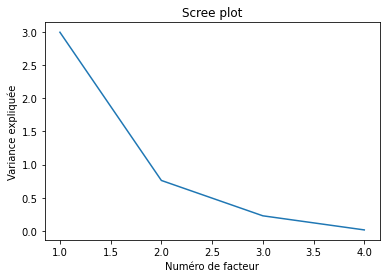

In [10]:
#scree plot
plt.plot(numpy.arange(1,p+1),eigval) 
plt.title("Scree plot") 
plt.ylabel("Variance expliquée") 
plt.xlabel("Numéro de facteur")
plt.show()

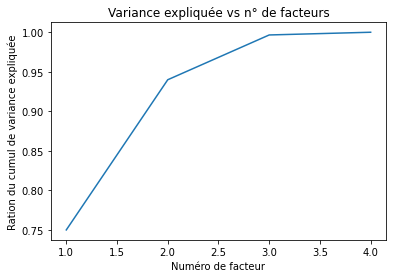

In [11]:
#cumul de variance expliquée 
plt.plot(numpy.arange(1,p+1),numpy.cumsum(acp.explained_variance_ratio_))
plt.title("Variance expliquée vs n° de facteurs") 
plt.ylabel("Ration du cumul de variance expliquée") 
plt.xlabel("Numéro de facteur") 
plt.show()

In [12]:
#seuils pour test des bâtons brisés
bs = 1/numpy.arange(p,0,-1) 
bs = numpy.cumsum(bs) 
bs = bs[::-1]

In [13]:
#test des bâtons brisés 
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

   Val.Propre    Seuils
0    2.998745  2.083333
1    0.760638  1.083333
2    0.226851  0.583333
3    0.013766  0.250000


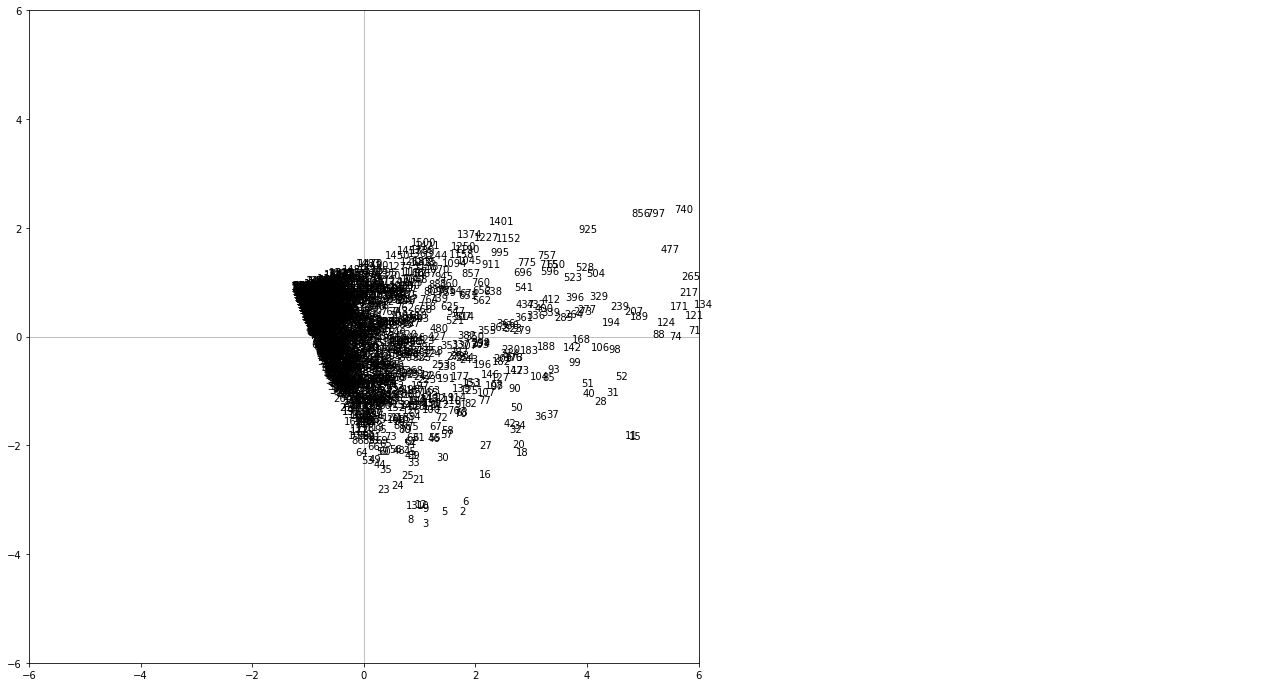

In [14]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12)) 
axes.set_xlim(-6,6) #même limites en abscisse 
axes.set_ylim(-6,6) #et en ordonnée 

#placement des étiquettes des observations
#(comme ils sont classés par score je modifie le range de la boucle pour n'en sélectionné que 15 car sinon il y a trop de données)
for i in range(n): 
    plt.annotate(X.index[i],(coord[i,0],coord[i,1]))
    
#ajouter les axes 
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1) 
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1) 
    
#affichage
plt.show()

In [15]:
#contribution des individus dans l'inertie totale
di = numpy.sum(Z**2,axis=1)
print(pd.DataFrame({'ID':X.index,'d_i':di}))
print("(index)",X.index[750] , ":(contribution totale)" , di[750])
print("(index)",X.index[482] , ":(contribution totale)" , di[482])
print("(index)",X.index[115] , ":(contribution totale)" , di[115])
print("(index)",X.index[71] , ":(contribution totale)" , di[71])
print("(index)",X.index[2] , ":(contribution totale)" , di[2])

        ID         d_i
0        0  286.180522
1        1   58.818653
2        2   13.695478
3        3   13.741032
4        4  201.223349
...    ...         ...
1500  1500    3.895893
1501  1501    2.424646
1502  1502    1.705368
1503  1503    2.452466
1504  1504    1.721899

[1505 rows x 2 columns]
(index) 750 :(contribution totale) 0.057939637188486354
(index) 482 :(contribution totale) 0.5900379841658595
(index) 115 :(contribution totale) 39.055818233365734
(index) 71 :(contribution totale) 34.2847077856558
(index) 2 :(contribution totale) 13.695477740926025


In [16]:
#qualité de représentation des individus - COS2 
cos2 = coord**2 
for j in range(p): 
    cos2[:,j] = cos2[:,j]/di 
print(pd.DataFrame({'id':X.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

        id    COS2_1    COS2_2
0        0  0.849637  0.002917
1        1  0.961415  0.031820
2        2  0.213762  0.783475
3        3  0.080866  0.889867
4        4  0.827770  0.000598
...    ...       ...       ...
1500  1500  0.184927  0.719233
1501  1501  0.641841  0.330857
1502  1502  0.233492  0.753084
1503  1503  0.648304  0.322892
1504  1504  0.298180  0.698267

[1505 rows x 3 columns]


In [17]:
#vérifions la théorie - somme en ligne des cos2 = 1 
print(numpy.sum(cos2,axis=1))

[1. 1. 1. ... 1. 1. 1.]


In [18]:
#contributions aux axes 
ctr = coord**2 
for j in range(p): 
    ctr[:,j] = ctr[:,j]/(n*eigval[j]) 
CTR=pd.DataFrame({'id':X.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]})
print(CTR)
print(CTR.iloc[CTR['CTR_1'].idxmax()])
print(CTR.iloc[CTR['CTR_2'].idxmax()])

        id     CTR_1     CTR_2
0        0  0.053876  0.000729
1        1  0.012530  0.001635
2        2  0.000649  0.009373
3        3  0.000246  0.010681
4        4  0.036907  0.000105
...    ...       ...       ...
1500  1500  0.000160  0.002448
1501  1501  0.000345  0.000701
1502  1502  0.000088  0.001122
1503  1503  0.000352  0.000692
1504  1504  0.000114  0.001050

[1505 rows x 3 columns]
id       47.000000
CTR_1     0.057832
CTR_2     0.008531
Name: 47, dtype: float64
id       1110.000000
CTR_1       0.029255
CTR_2       0.020644
Name: 1110, dtype: float64


In [19]:
#vérification 
print(numpy.sum(ctr,axis=0))

[1. 1. 1. 1.]


In [20]:
#le champ components_ de l'objet ACP (vecteurs propres) 
print(acp.components_)

[[ 0.32828762  0.55446401  0.55619288  0.52482986]
 [-0.9428367   0.22957967  0.20049329  0.13473893]
 [-0.05348067 -0.37015498 -0.39237916  0.84033547]
 [ 0.02064019  0.70911786 -0.70462083 -0.01534051]]


In [21]:
#racine carrée des valeurs propres 
sqrt_eigval = numpy.sqrt(eigval)
#corrélation des variables avec les axes 
corvar = numpy.zeros((p,p)) 
for k in range(p): 
    corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k] #afficher la matrice des corrélations variables x facteurs
print(corvar)

[[ 0.56849188 -0.82229087 -0.02547227  0.00242166]
 [ 0.96015892  0.2002269  -0.17630084  0.08319889]
 [ 0.96315279  0.17485934 -0.18688598 -0.08267127]
 [ 0.90884181  0.11751197  0.40024277 -0.00179986]]


In [22]:
#on affiche pour les deux premiers axes 
print(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

          id     COR_1     COR_2
0      Score  0.568492 -0.822291
1  Scored by  0.960159  0.200227
2    Members  0.963153  0.174859
3  Favorites  0.908842  0.117512


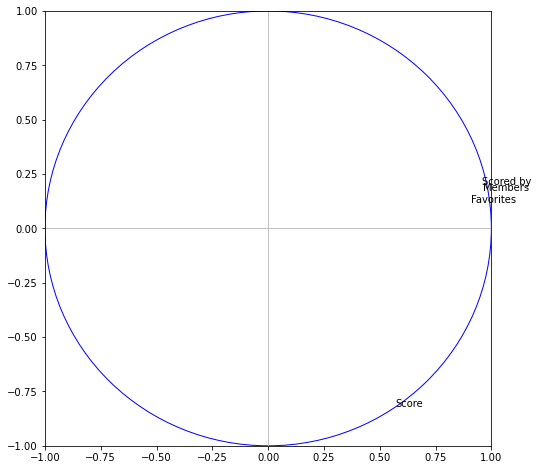

In [23]:
#cercle des corrélations 
fig, axes = plt.subplots(figsize=(8,8)) 
axes.set_xlim(-1,1) 
axes.set_ylim(-1,1)

#affichage des étiquettes (noms des variables) 
for j in range(p): 
    plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1])) 
    
#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle 
cercle = plt.Circle((0,0),1,color='blue',fill=False) 
axes.add_artist(cercle) 

#affichage
plt.show()

In [24]:
#cosinus carré des variables
cos2var = corvar**2 
print(pd.DataFrame({'id':X.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]}))

          id    COS2_1    COS2_2
0      Score  0.323183  0.676162
1  Scored by  0.921905  0.040091
2    Members  0.927663  0.030576
3  Favorites  0.825993  0.013809


In [25]:
#contributions 
ctrvar = cos2var 
for k in range(p): 
    ctrvar[:,k] = ctrvar[:,k]/eigval[k] 
    
#on n'affiche que pour les deux premiers axes
print(pd.DataFrame({'id':X.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]}))

          id     CTR_1     CTR_2
0      Score  0.107773  0.888941
1  Scored by  0.307430  0.052707
2    Members  0.309351  0.040198
3  Favorites  0.275446  0.018155


In [26]:
#traitement de var. quali supplémentaire 
vsQuali = df.iloc[:,10]
print(vsQuali)

0       Excellent
1       Excellent
2       Excellent
3       Excellent
4       Excellent
          ...    
1500     Mediocre
1501     Mediocre
1502     Mediocre
1503     Mediocre
1504     Mediocre
Name: Niveau, Length: 1505, dtype: object


In [27]:
#modalités de la variable qualitative 
modalites = numpy.unique(vsQuali)
print(modalites)

['Bon' 'Excellent' 'Mediocre']


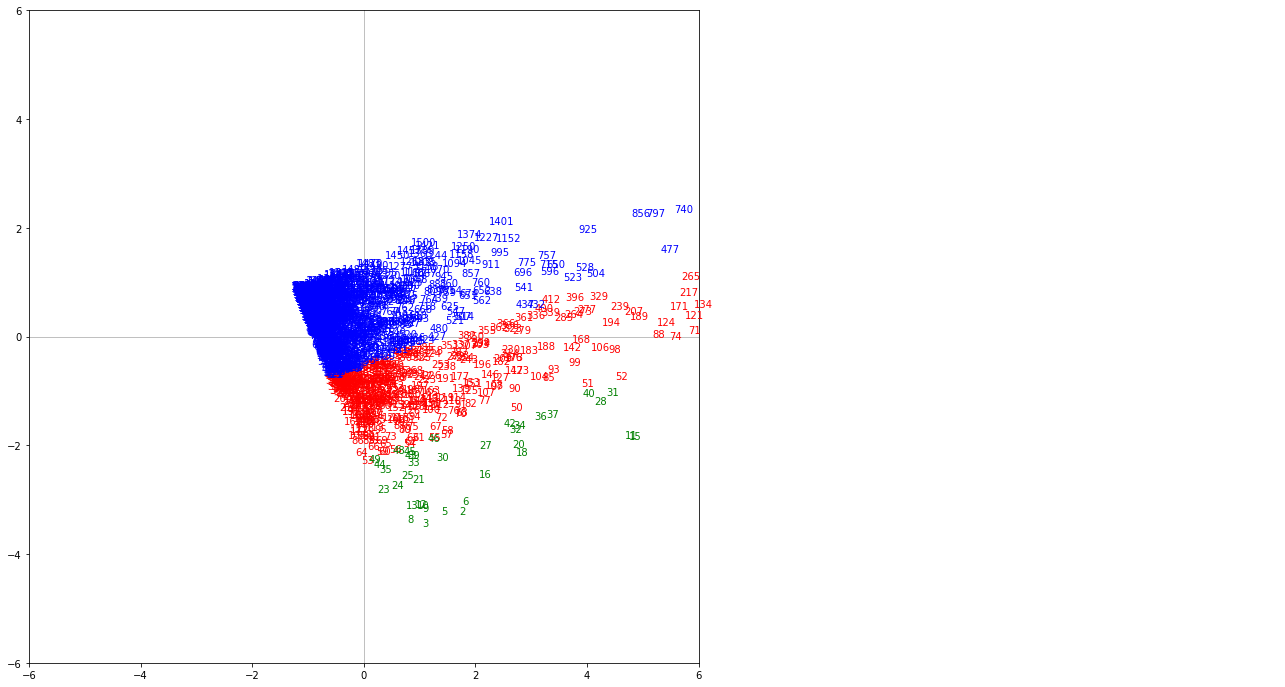

In [28]:
#liste des couleurs 
couleurs = ['r','g','b'] 

#faire un graphique en coloriant les points 
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)

#pour chaque modalité de la var. illustrative
for c in range(len(modalites)): 
    
    #numéro des individus concernés
    numero = numpy.where(vsQuali == modalites[c]) 
    
    #les passer en revue pour affichage 
    for i in numero[0]: 
        plt.annotate(X.index[i],(coord[i,0],coord[i,1]),color=couleurs[c]) 
        
#ajouter les axes 
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1) 
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1) 

#affichage 
plt.show()

In [29]:
#structure intermédiaire 
df = pd.DataFrame({'Niveau':vsQuali,'F1':coord[:,0],'F2':coord[:,1]})
#puis calculer les moyennes conditionnelles
print(df.pivot_table(index='Niveau',values=['F1','F2'],aggfunc=pd.Series.mean))

                 F1        F2
Niveau                       
Bon        0.949723 -0.854492
Excellent  3.813297 -1.716938
Mediocre  -0.500934  0.371645
